In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\kotesh Reddy\Downloads\archive (15)\Clean_Dataset.csv")

In [3]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [4]:
df["Unnamed: 0"].nunique()

300153

In [5]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [6]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [7]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [8]:
df.corr()

,duration,days_left,price
duration,1.000000,-0.039157,0.204222
days_left,-0.039157,1.000000,-0.091949
price,0.204222,-0.091949,1.000000


In [9]:
df.shape

(300153, 11)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [11]:
df["airline"].unique()

array(['SpiceJet', 'AirAsia', 'Vistara', 'GO_FIRST', 'Indigo',
       'Air_India'], dtype=object)

In [12]:
df["flight"].nunique()

1561

In [13]:
df.nunique()

airline                 6
flight               1561
source_city             6
departure_time          6
stops                   3
arrival_time            6
destination_city        6
class                   2
duration              476
days_left              49
price               12157
dtype: int64

In [14]:
df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [15]:
df.drop("flight",axis=1,inplace=True)

In [16]:
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


Text(0, 0.5, 'Frequency')

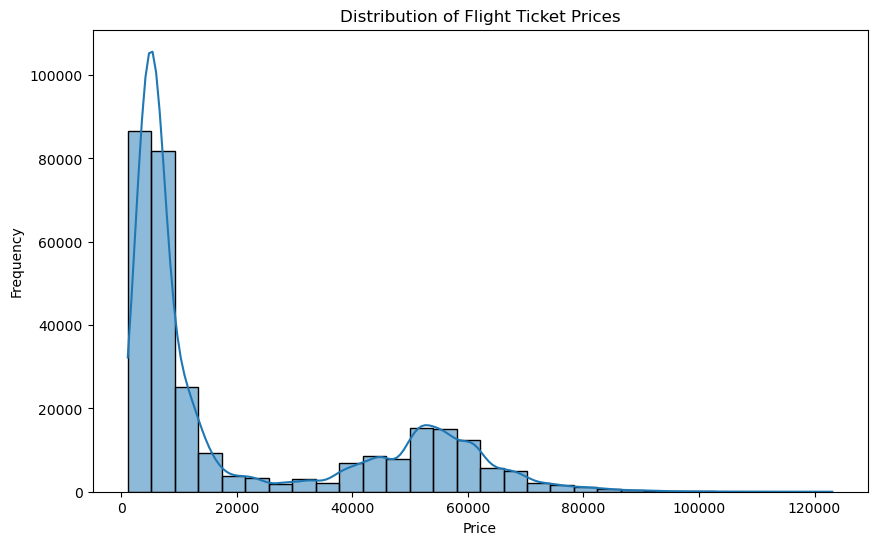

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Distribution of Flight Ticket Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')


Text(0, 0.5, 'Price')

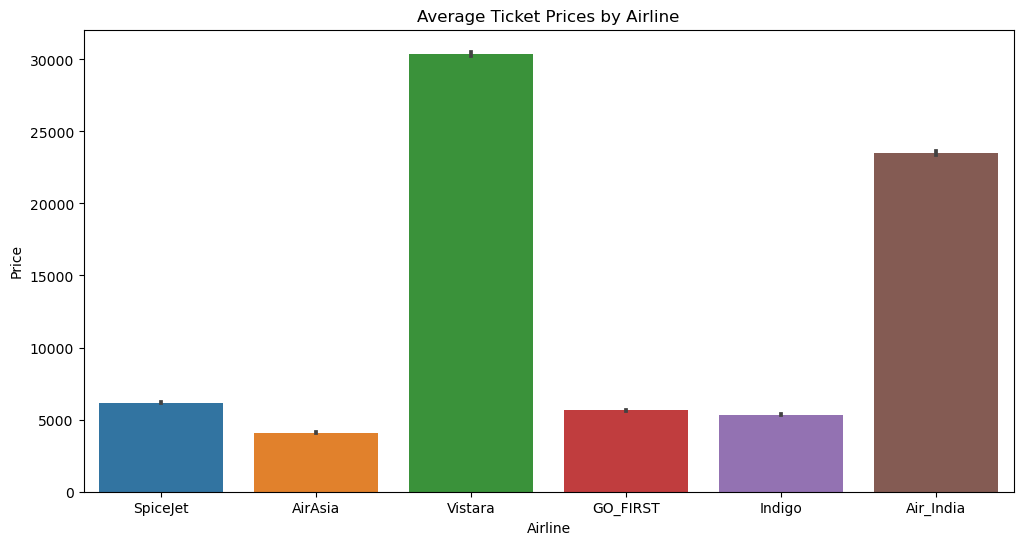

In [18]:
plt.figure(figsize=(12, 6))
sns.barplot(x='airline', y='price', data=df)
plt.title('Average Ticket Prices by Airline')
plt.xlabel('Airline')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

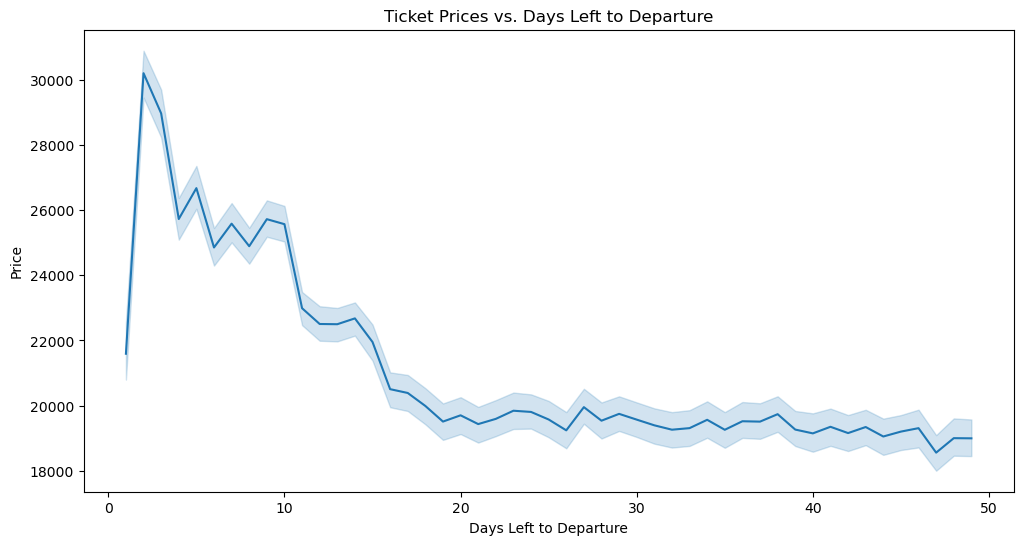

In [19]:
#Ticket booking before 1 or 2 days vs advanced booking
plt.figure(figsize=(12, 6))
sns.lineplot(x='days_left', y='price', data=df)
plt.title('Ticket Prices vs. Days Left to Departure')
plt.xlabel('Days Left to Departure')
plt.ylabel('Price')

<AxesSubplot:xlabel='days_left', ylabel='Density'>

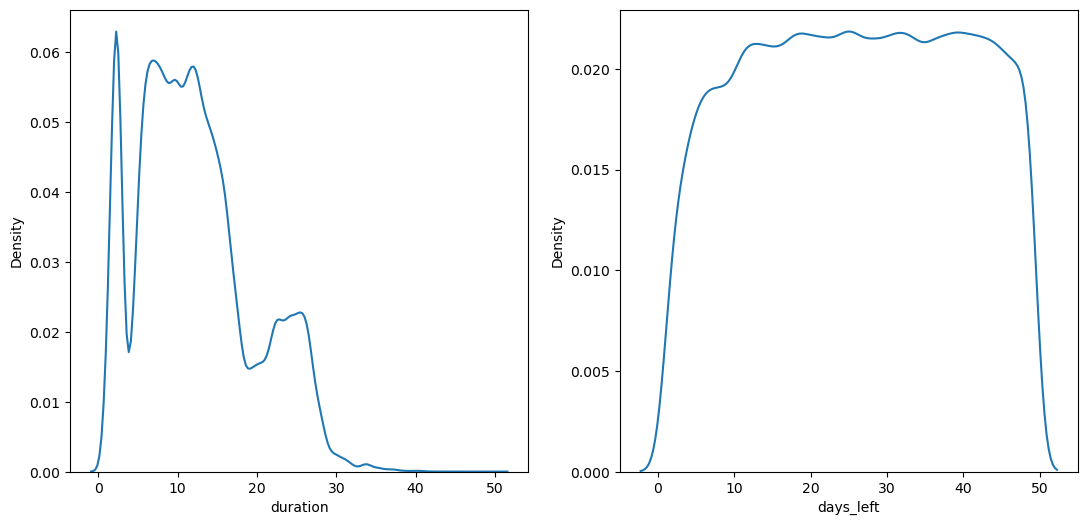

In [20]:
#Check for outliers
fig,ax = plt.subplots(1,2,figsize = (13,6))
sns.kdeplot(df["duration"],ax = ax[0])
sns.kdeplot(df["days_left"],ax = ax[1])

C:\Users\kotesh Reddy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='duration'>

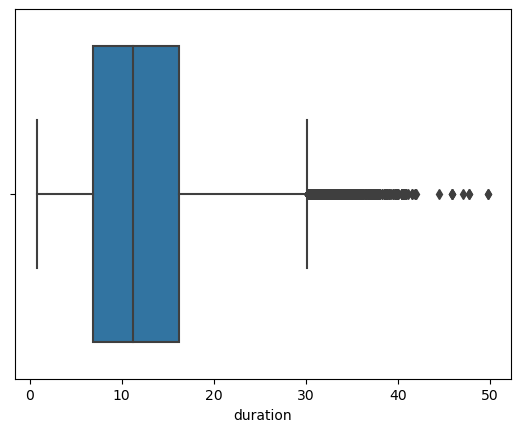

In [21]:
sns.boxplot(df["duration"])

In [22]:
std = df["duration"].mean()+3*df["duration"].std()  

In [23]:
std

33.797012527072866

In [24]:
tot = len(df[df["duration"]>std])

In [25]:
tot/len(df["duration"])*100

0.24054398923215825

In [26]:
def capping(data):
    if data>std:
        data = std
    
    return data

### Categorical encoding

In [27]:
#import libraries
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

In [28]:
#X data and Y data
X = df.drop("price",axis=1)
y = df["price"]

In [29]:
X.shape,y.shape

((300153, 9), (300153,))

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [31]:
X_train.shape

(225114, 9)

In [32]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score 

In [33]:
df.head(5)

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [34]:
df["class"].unique()

array(['Economy', 'Business'], dtype=object)

In [35]:
df["airline"].unique()

array(['SpiceJet', 'AirAsia', 'Vistara', 'GO_FIRST', 'Indigo',
       'Air_India'], dtype=object)

In [36]:
df["stops"].unique()

array(['zero', 'one', 'two_or_more'], dtype=object)

In [37]:
trans = ColumnTransformer(transformers=[
    ("ordinal1",OrdinalEncoder(categories=[["Economy","Business"]]),["class"]),
    ("ordinal2",OrdinalEncoder(categories=[["AirAsia","Vistara","Indigo","Air_India","GO_FIRST","SpiceJet"]]),["airline"]),
    ("onehot",OneHotEncoder(sparse=False,drop="first"),["source_city","departure_time","stops","arrival_time","destination_city","class"])
],remainder="passthrough")

In [38]:
#Scaling
tr2 = ColumnTransformer(transformers=[
    ("Scaling",StandardScaler(),slice(0,9))
])

In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
tr3 = Ridge(alpha=1)

### Pipeline

In [41]:
from sklearn.pipeline import Pipeline,make_pipeline

In [42]:
pipe = Pipeline([
    ("tr1",trans),
    ("tr2",tr2),
    ("tr3",tr3)
])

In [43]:
from sklearn import set_config
set_config(display="diagram")

In [44]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('tr1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinal1',
                                                  OrdinalEncoder(categories=[['Economy',
                                                                              'Business']]),
                                                  ['class']),
                                                 ('ordinal2',
                                                  OrdinalEncoder(categories=[['AirAsia',
                                                                              'Vistara',
                                                                              'Indigo',
                                                                              'Air_India',
                                                                              'GO_FIRST',
                                                                              'SpiceJet']]),
                                                  ['airline']),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['source_city',
                                                   'departure_time', 'stops',
                                                   'arrival_time',
                                                   'destination_city',
                                                   'class'])])),
                ('tr2',
                 ColumnTransformer(transformers=[('Scaling', StandardScaler(),
                                                  slice(0, 9, None))])),
                ('tr3', Ridge(alpha=1))])

In [45]:
#Prediction 
y_pred = pipe.predict(X_test)

In [46]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error,r2_score

In [47]:
mean_absolute_error(y_test,y_pred)

4891.587511635921

In [48]:
mean_squared_error(y_test,y_pred)

59474214.639392585

In [49]:
r2_score(y_test,y_pred)

0.8843512580514257